## *Data-Driven Insights for UPI Optimization*

### *Tools Used* 
Python, Pandas, Matplotlib, Seaborn.

### *Business Problem*
How can banks and digital payment platforms optimize UPI transaction services by analyzing customer behavior patterns across different cities, time periods, age groups, and transaction volumes?

### *Key Objective*
- Identify peak transaction times (by time of day, day of week, or month).
- Analyze behavior by age group and gender — who uses UPI most, when, and how?
- Compare transaction trends across banks (sending vs receiving).
- Understand regional differences in transaction habits (city-wise insights).
- Detect anomalies or outliers in balance or transaction patterns (potential fraud or special campaigns).


### *Potiential Impact*
- Help banks plan targeted marketing and cashback offers
- Optimize server loads or support staff during peak hours.
- Design custom UPI experiences based on user demographics.

*Author* - *Niranjan (Data Analyst)*

### *Environmental Setup*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### *Data Loading*

In [2]:
df = pd.read_excel("UPI_transactions.xlsx")

### *Data Understanding*

In [3]:
df.head(3)

,Date (dd/mm/yyyy),Time,Transaction (thousands),Sent From Bank,City,Age,Gender,Bank Received,Balance (thousands),Customer ID,Age Groups
0,2023-06-30,1:22:34,643.714122,Axis Bank,Mumbai,71,Male,Bank of India,484.504798,11,Senior Adult
1,2023-08-10,10:37:27,198.788436,Axis Bank,Hyderabad,83,Female,Bandhan Bank,981.841670,12,Senior Adult
2,2022-01-21,9:59:33,369.966567,Axis Bank,Mumbai,69,Male,ICICI,681.097801,22,Senior Adult


In [4]:
df.shape

(3000, 11)

In [5]:
df.dtypes

Date (dd/mm/yyyy)          datetime64[ns]
Time                               object
Transaction (thousands)           float64
Sent From Bank                     object
City                               object
Age                                 int64
Gender                             object
Bank Received                      object
Balance (thousands)               float64
Customer ID                         int64
Age Groups                         object
dtype: object

In [6]:
df.columns.tolist()

['Date (dd/mm/yyyy)',
 'Time',
 'Transaction (thousands)',
 'Sent From Bank',
 'City',
 'Age',
 'Gender',
 'Bank Received ',
 'Balance (thousands)',
 'Customer ID',
 'Age Groups']

### *Data Exploration*

#### *Date*

In [7]:
df["Date (dd/mm/yyyy)"].unique()

<DatetimeArray>
['2023-06-30 00:00:00', '2023-08-10 00:00:00', '2022-01-21 00:00:00',
 '2023-09-11 00:00:00', '2023-07-14 00:00:00', '2022-10-03 00:00:00',
 '2024-01-28 00:00:00', '2024-01-13 00:00:00', '2023-11-24 00:00:00',
 '2023-11-28 00:00:00',
 ...
 '2023-03-06 00:00:00', '2023-10-07 00:00:00', '2023-11-07 00:00:00',
 '2023-02-25 00:00:00', '2023-02-28 00:00:00', '2023-03-15 00:00:00',
 '2022-11-13 00:00:00', '2024-01-03 00:00:00', '2023-06-09 00:00:00',
 '2022-12-08 00:00:00']
Length: 749, dtype: datetime64[ns]

In [8]:
df["Date (dd/mm/yyyy)"].nunique()

749

*Out of 3000 records date column is having 749 records, may be most of the tranzaction occured on the same date*

*Check for the Date Range, maximum to minimum*

In [9]:
df['Date (dd/mm/yyyy)'].min(),df['Date (dd/mm/yyyy)'].max()

(Timestamp('2022-01-01 00:00:00'), Timestamp('2024-02-01 00:00:00'))

*Identify missing dates or gaps*

In [10]:
df['Date (dd/mm/yyyy)'].value_counts().sort_index()

Date (dd/mm/yyyy)
2022-01-01    5
2022-01-02    5
2022-01-03    3
2022-01-04    1
2022-01-05    6
             ..
2024-01-28    6
2024-01-29    1
2024-01-30    1
2024-01-31    2
2024-02-01    5
Name: count, Length: 749, dtype: int64

*Check for the missing values*

In [11]:
df['Date (dd/mm/yyyy)'].isna().sum()

0

#### *Time*

In [12]:
df['Time'].nunique()

2897

*clearly shows that most tranzaction has unique timestamp*

In [13]:
df['Time'].unique()

array(['1:22:34', '10:37:27', '9:59:33', ..., '3:3:46', '1:27:33',
       '11:51:3'], dtype=object)

*Check for the missing values*

In [14]:
df['Time'].isna().sum()

0

*No missing value*

#### *Transaction (thousand)*

In [15]:
df['Transaction (thousands)'].dtype

dtype('float64')

In [16]:
df['Transaction (thousands)'].nunique()

3000

In [17]:
df['Transaction (thousands)'].head()

0    643.714122
1    198.788436
2    369.966567
3    288.951851
4    698.746405
Name: Transaction (thousands), dtype: float64

In [18]:
df['Transaction (thousands)'].isna().sum()

0

*Transaction doesnot have null values*

<Axes: xlabel='Transaction (thousands)'>

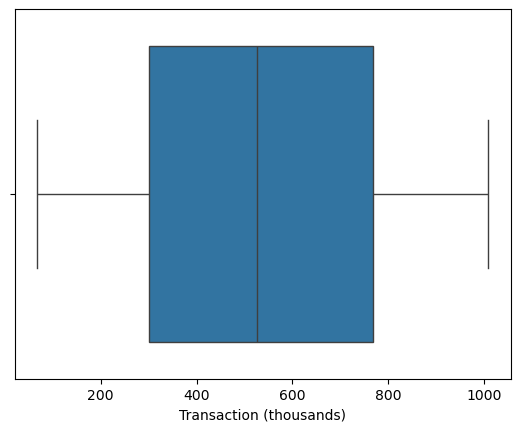

In [19]:
sns.boxplot(data = df, x = "Transaction (thousands)")

*No outlier detected*

#### *Sent From Bank*

In [20]:
df['Sent From Bank'].unique()

array(['Axis Bank', 'KreditBee', 'HDFC', 'Union Bank', 'ICICI'],
      dtype=object)

In [21]:
df['Sent From Bank'].value_counts()

Sent From Bank
ICICI         624
Union Bank    613
Axis Bank     599
HDFC          586
KreditBee     578
Name: count, dtype: int64

*Most of the tranzaction occured through the ICICI Bank*

In [22]:
df['Sent From Bank'].dtype

dtype('O')

In [23]:
df['Sent From Bank'].isna().sum()

0

*No missing value*

<Axes: ylabel='Sent From Bank'>

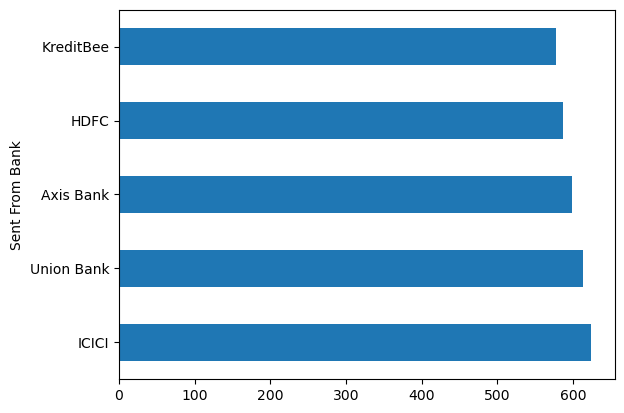

In [24]:
df['Sent From Bank'].value_counts().head(10).plot(kind='barh')

#### *City*

In [25]:
df['City'].dtype

dtype('O')

In [26]:
df['City'].unique()

array(['Mumbai', 'Hyderabad', 'Bangalore', 'Delhi', 'Chennai'],
      dtype=object)

In [27]:
df['City'].value_counts()

City
Bangalore    616
Hyderabad    615
Delhi        600
Chennai      597
Mumbai       572
Name: count, dtype: int64

In [28]:
df['City'].isna().sum()

0

*No Missing values*

#### *Age*

In [29]:
df['Age'].dtype

dtype('int64')

In [30]:
df['Age'].unique()

array([71, 83, 69, 78, 64, 62, 82, 72, 76, 84, 65, 61, 68, 77, 79, 74, 73,
       81, 66, 80, 75, 67, 60, 63, 70, 21, 22, 19, 29, 36, 34, 28, 18, 38,
       27, 39, 30, 32, 25, 31, 23, 20, 37, 24, 35, 26, 33, 52, 58, 54, 44,
       46, 41, 59, 42, 45, 55, 40, 51, 49, 47, 48, 53, 56, 57, 43, 50, 17],
      dtype=int64)

In [31]:
df['Age'].isna().sum()

0

<Axes: xlabel='Age'>

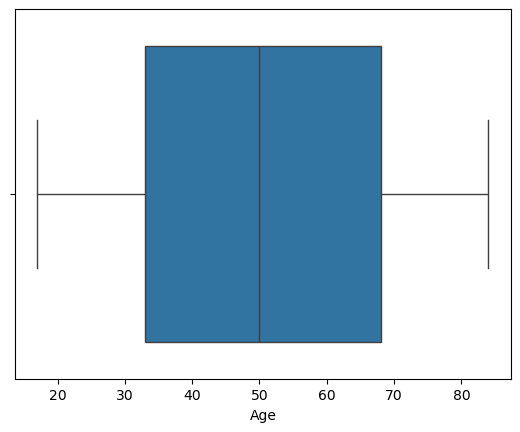

In [32]:
sns.boxplot(x=df['Age'])

*No null values*

In [33]:
df['Age'].describe()

count    3000.000000
mean       50.344000
std        19.725686
min        17.000000
25%        33.000000
50%        50.000000
75%        68.000000
max        84.000000
Name: Age, dtype: float64

- *Minimum age - 17*
- *Maximum age - 84*

#### *Gender*

In [34]:
df['Gender'].dtype

dtype('O')

In [35]:
df['Gender'].nunique

<bound method IndexOpsMixin.nunique of 0         Male
1       Female
2         Male
3         Male
4         Male
         ...  
2995    Female
2996      Male
2997    Female
2998      Male
2999    Female
Name: Gender, Length: 3000, dtype: object>

In [36]:
df['Gender'].value_counts()

Gender
Male      1514
Female    1486
Name: count, dtype: int64

*Male are a little high as compared to female*

#### *Bank Received*

In [37]:
df['Bank Received '].dtype

dtype('O')

In [38]:
df['Bank Received '].nunique()

8

In [39]:
df['Bank Received '].value_counts()

Bank Received 
HDFC              433
Axis Bank         400
Bandhan Bank      386
Bank of India     383
Union Bank        360
Bank of Baroda    349
ICICI             348
KreditBee         341
Name: count, dtype: int64

*Most of the tranzaction were recieved from the HDFC bank*

#### *Balance(thousand)*

In [40]:
df['Balance (thousands)'].dtype

dtype('float64')

In [41]:
df['Balance (thousands)'].nunique()

3000

In [42]:
df['Balance (thousands)'].head()

0    484.504798
1    981.841670
2    681.097801
3    236.090819
4    765.327698
Name: Balance (thousands), dtype: float64

In [43]:
df['Balance (thousands)'].isna().sum()

0

<Axes: xlabel='Balance (thousands)'>

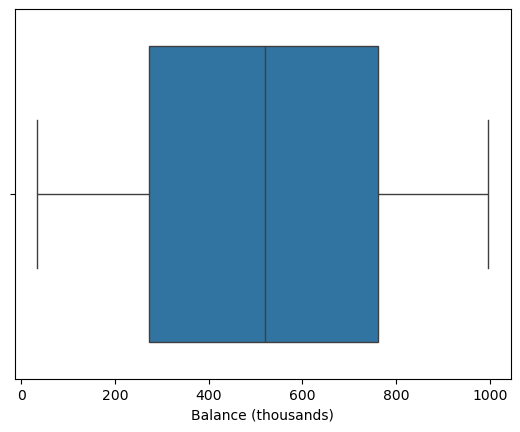

In [44]:
sns.boxplot(data = df, x = 'Balance (thousands)')

*No outlier detected*

#### *Customer ID*

In [45]:
df['Customer ID'].dtype

dtype('int64')

In [46]:
df['Customer ID'].unique()

array([11, 12, 22, 10, 17,  4,  6,  7, 21,  8, 20, 18, 15,  9, 19, 16, 13,
       14,  1,  3,  5,  2], dtype=int64)

In [47]:
df['Customer ID'].nunique()

22

In [48]:
df['Customer ID'].duplicated().sum()

2978

In [49]:
df['Customer ID'].isna().sum()

0

#### *Age Groups*

In [50]:
df['Age Groups'].dtype

dtype('O')

In [51]:
df['Age Groups'].unique()

array(['Senior Adult', 'Adult', 'Middle Age Adult', 'Teen'], dtype=object)

### *Data Cleaning*

### *Date*
- *Converting the name*
- *Converting to date time*
- *Categorizing them as year date month weekend week*

In [52]:
# Rename the column for simplicity
df.rename(columns={'Date (dd/mm/yyyy)': 'Date'}, inplace=True)

In [53]:
# Convert the data into date time format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

In [54]:
# Extract useful features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()
df['Week'] = df['Date'].dt.isocalendar().week

### *Time*
- *Ensure proper time form*
- *Extract hours for analysis*
- *Create Time-of-Day (morning, Afternoon, Evening, Night)*

In [55]:
# Convert to datetime to extract the time part
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time

In [56]:
# Create 'Hour' column from Time
df['Hour'] = pd.to_datetime(df['Time'].astype(str)).dt.hour

In [57]:
def get_time_period(hour):
    if pd.isnull(hour):
        return 'Unknown'
    elif 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time_Period'] = df['Hour'].apply(get_time_period)

#### *Transaction (thousands)*

In [58]:
df.rename(columns={'Transaction (thousands)': 'Transaction'}, inplace=True)

#### *Sent From Bank*

In [59]:
df.rename(columns={'Sent From Bank': 'Sent_From_Bank'}, inplace=True)

In [60]:
df['Sent_From_Bank'] = df['Sent_From_Bank'].str.strip()

#### *City*
- *Remove leading/ trailing spaces*
- *Convert to category to make it memory efficient*

In [61]:
df['City'] = df['City'].str.strip()  # Remove leading/trailing spaces
df['City'] = df['City'].astype('category')  # Optional: memory efficient

### *Bank Recieved*
- *Rename the column to avoid confussion*
- *Strip space to avois duplicates like "HDFC " vs "HDFC"*
- *Convert to category for memory performance*
- *Check for missing values to decide imutation is needed*

In [62]:
df.rename(columns={'Bank Received ': 'Bank_Received'}, inplace=True)

In [63]:
df['Bank_Received'] = df['Bank_Received'].astype('category')

In [64]:
df['Bank_Received'] = df['Bank_Received'].str.strip()

#### *Balance (thousands)*

In [65]:
df.rename(columns={'Balance (thousands)': 'Balance'}, inplace=True)

#### *Customer ID*

In [66]:
df.rename(columns={'Customer ID': 'Customer_ID'}, inplace=True)

#### *Age Group*

In [67]:
df.rename(columns={'Age Groups': 'Age_Groups'}, inplace=True)

In [68]:
df.columns

Index(['Date', 'Time', 'Transaction', 'Sent_From_Bank', 'City', 'Age',
       'Gender', 'Bank_Received', 'Balance', 'Customer_ID', 'Age_Groups',
       'Year', 'Month', 'Day', 'Weekday', 'Week', 'Hour', 'Time_Period'],
      dtype='object')

In [69]:
df.isna().sum()

Date               0
Time              57
Transaction        0
Sent_From_Bank     0
City               0
Age                0
Gender             0
Bank_Received      0
Balance            0
Customer_ID        0
Age_Groups         0
Year               0
Month              0
Day                0
Weekday            0
Week               0
Hour              57
Time_Period        0
dtype: int64

- *Missing values in time columns, Time column is critical to analyze customer behviour and pattersn across differet time of the day*

In [70]:
df = df.dropna(subset=['Time'])

In [71]:
# Drop columns that are not needed for analysis
#df.drop(columns=['Time'], inplace=True)

# Optional: Drop other derived columns if not needed in Power BI (you can recreate them there)
# df.drop(columns=['Year', 'Month', 'Day', 'Week', 'Weekday'], inplace=True)

### *Exploratory Data Analysis*
1. *Univariate Analysis*
   - Continous -> Transaction, Balance, Age
   - Categorical -> Gender, Sent from bank, Bank Recieved, City, Age_Group
   - Time Series -> Month, Hour, Weekend
3. *Bivariate Analysis*
4. *Multivariate Analysis*

In [72]:
categorical = [
    'Sent_From_Bank',
    'City',
    'Gender',
    'Bank_Received',
    'Age_Groups',
    'Weekday',
    'Time_Period'
]

continuous = [
    'Transaction',
    'Balance',
    'Age'
]

time_series = [
    'Date',
    'Year',
    'Month',
    'Day',
    'Week',
    'Hour',
    'Time'
]

#### *Univariate Analysis Numerical Columns*

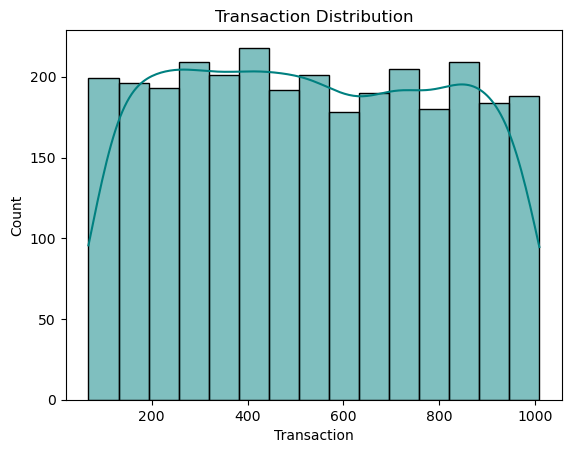

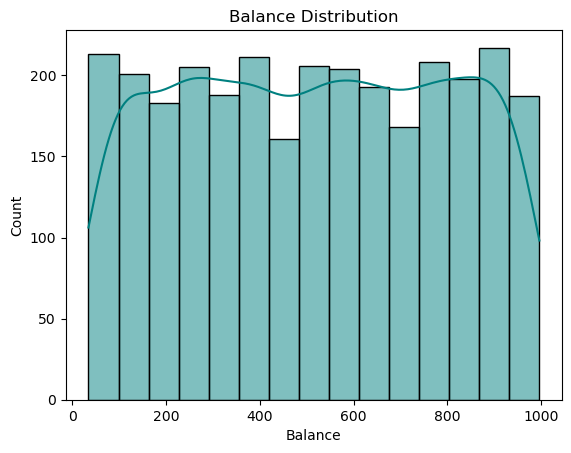

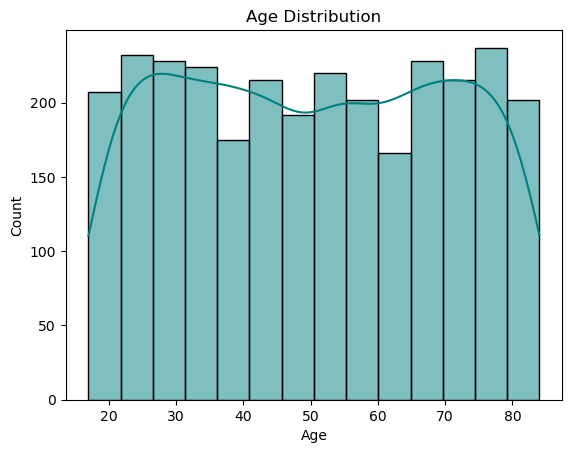

In [80]:
# Summary Stats
df[continuous].describe()

# Distribution Plots
for col in continuous:
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f'{col} Distribution')
    plt.show()


Sent_From_Bank:
 Sent_From_Bank
ICICI         611
Union Bank    600
Axis Bank     588
HDFC          578
KreditBee     566
Name: count, dtype: int64


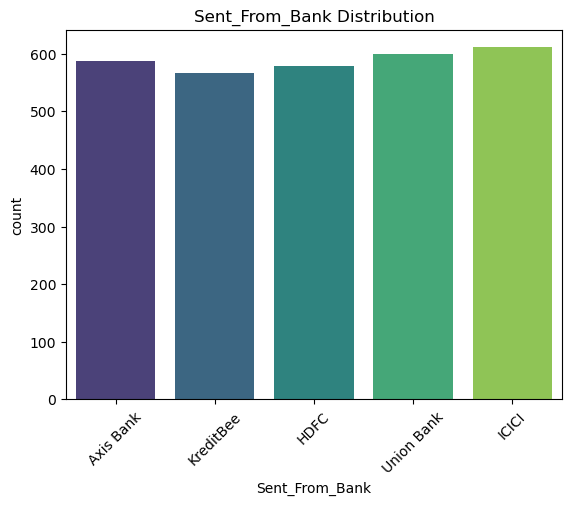


City:
 City
Bangalore    605
Hyderabad    599
Chennai      592
Delhi        589
Mumbai       558
Name: count, dtype: int64


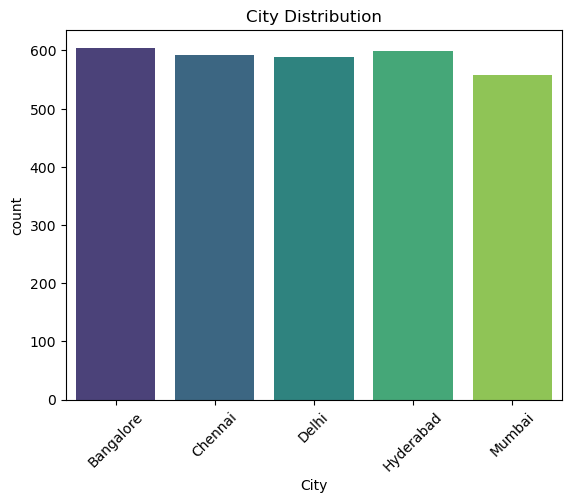


Gender:
 Gender
Male      1489
Female    1454
Name: count, dtype: int64


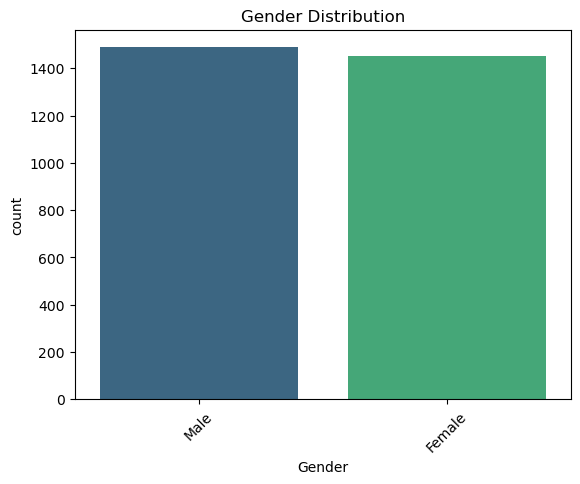


Bank_Received:
 Bank_Received
HDFC              423
Axis Bank         392
Bank of India     381
Bandhan Bank      378
Union Bank        353
ICICI             343
Bank of Baroda    341
KreditBee         332
Name: count, dtype: int64


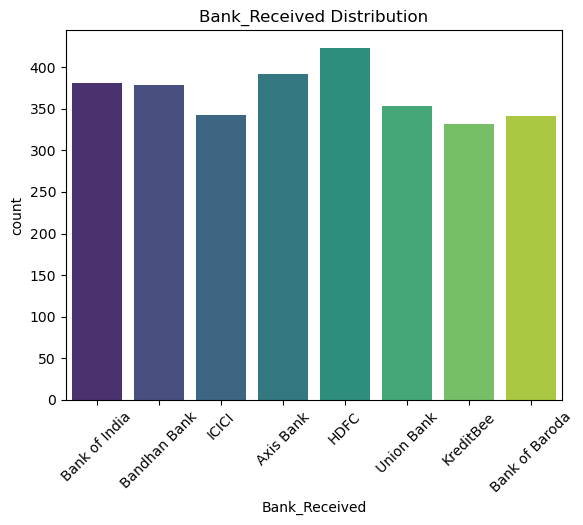


Age_Groups:
 Age_Groups
Senior Adult        1089
Adult                988
Middle Age Adult     828
Teen                  38
Name: count, dtype: int64


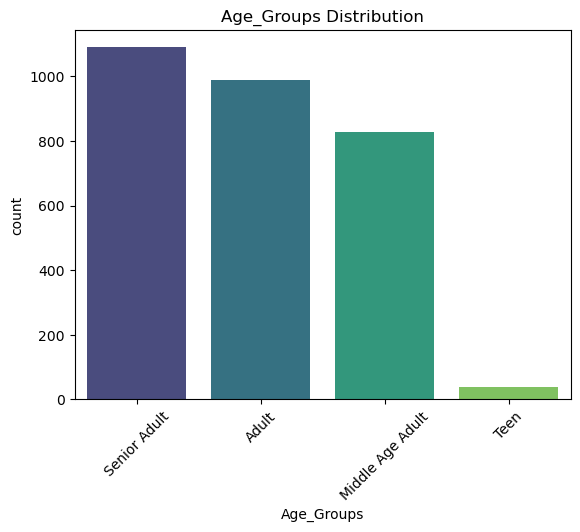


Weekday:
 Weekday
Friday       455
Tuesday      430
Sunday       423
Thursday     417
Monday       415
Saturday     407
Wednesday    396
Name: count, dtype: int64


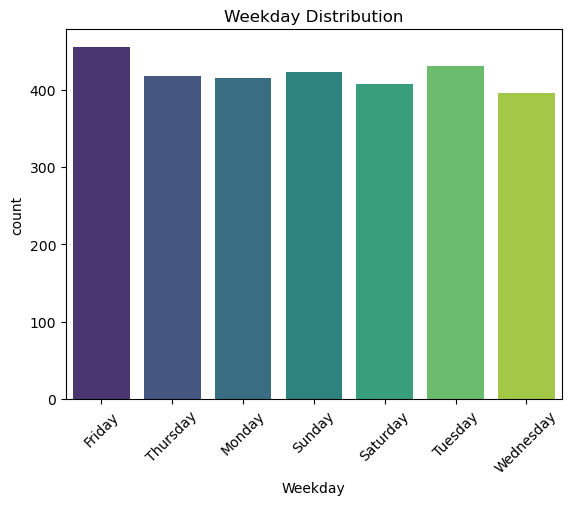


Time_Period:
 Time_Period
Morning      1741
Night         972
Afternoon     230
Name: count, dtype: int64


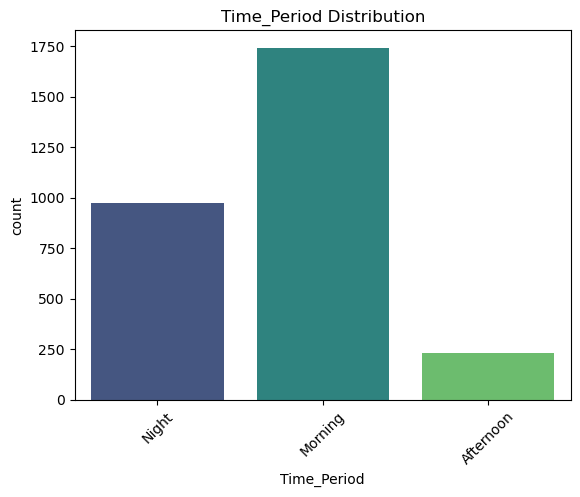

In [81]:
for col in categorical:
    count = df[col].value_counts()
    print(f"\n{col}:\n", count)

    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.show()

Age_Groups
Adult               526.355115
Middle Age Adult    542.866341
Senior Adult        534.075533
Teen                505.179814
Name: Transaction, dtype: float64
Gender
Female    530.982651
Male      536.123908
Name: Transaction, dtype: float64
City
Bangalore    523.319427
Chennai      539.585774
Delhi        533.544768
Hyderabad    534.973567
Mumbai       536.894636
Name: Transaction, dtype: float64


<Axes: xlabel='Age_Groups', ylabel='Transaction'>

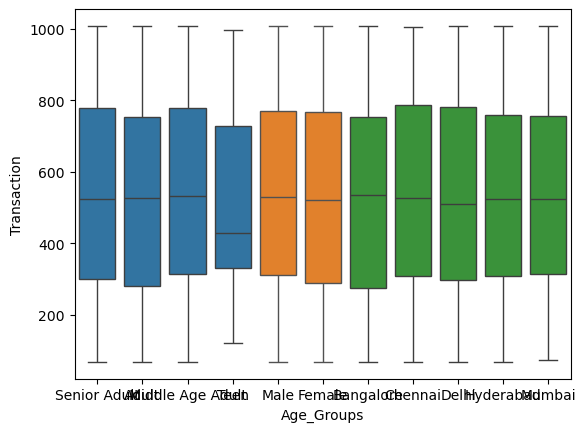

In [82]:
# Grouped Means
print(df.groupby('Age_Groups')['Transaction'].mean())
print(df.groupby('Gender')['Transaction'].mean())
print(df.groupby('City')['Transaction'].mean())

# Box Plots
sns.boxplot(x='Age_Groups', y='Transaction', data=df)
sns.boxplot(x='Gender', y='Transaction', data=df)
sns.boxplot(x='City', y='Transaction', data=df)

In [83]:
pd.crosstab(df['Age_Groups'], df['Gender'], margins=True)

Gender,Female,Male,All
Age_Groups,,,
Adult,485,503,988
Middle Age Adult,407,421,828
Senior Adult,544,545,1089
Teen,18,20,38
All,1454,1489,2943


In [84]:
# Avg and Count of Transactions by Bank
df.groupby('Bank_Received')[['Transaction']].agg(['mean', 'count']).sort_values(('Transaction', 'count'), ascending=False)

Transaction      
                      mean count
Bank_Received                   
HDFC            523.677693   423
Axis Bank       531.953889   392
Bank of India   514.451969   381
Bandhan Bank    499.169435   378
Union Bank      551.760411   353
ICICI           533.607000   343
Bank of Baroda  554.319173   341
KreditBee       568.620405   332

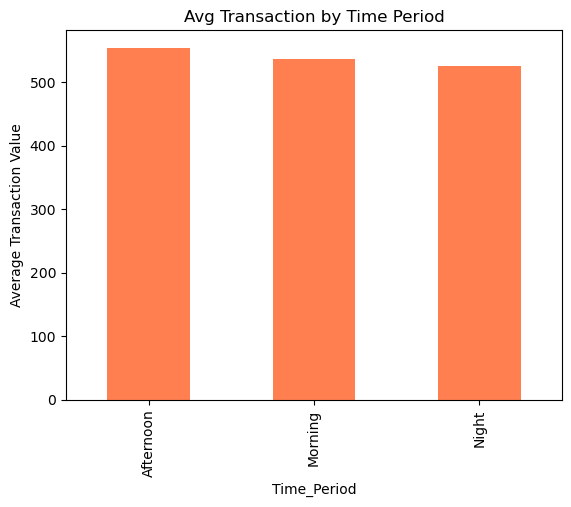

In [85]:
df.groupby('Time_Period')['Transaction'].mean().plot(kind='bar', color='coral', title='Avg Transaction by Time Period')
plt.ylabel("Average Transaction Value")
plt.show()

<Axes: title={'center': 'Monthly Total Transactions'}, xlabel='Year,Month'>

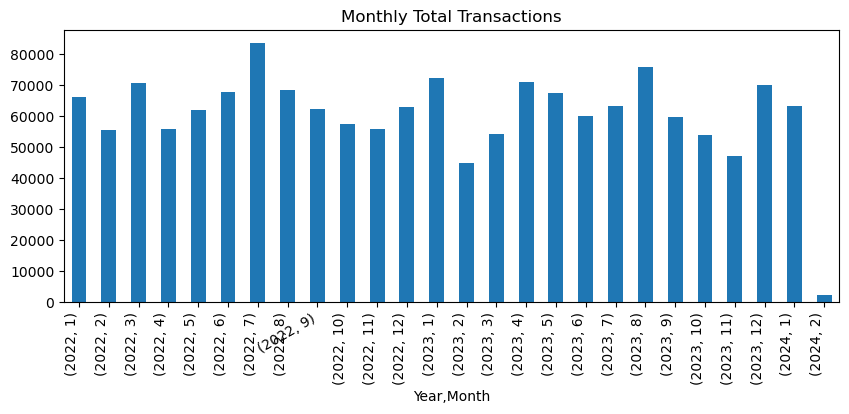

In [86]:
# Daily trend
daily = df.groupby('Date')['Transaction'].sum()
daily.plot(figsize=(10,4), title='Daily Total Transactions')

# Monthly trend
monthly = df.groupby(['Year', 'Month'])['Transaction'].sum()
monthly.plot(kind='bar', figsize=(10,4), title='Monthly Total Transactions')

Text(0.5, 1.0, 'Correlation Matrix')

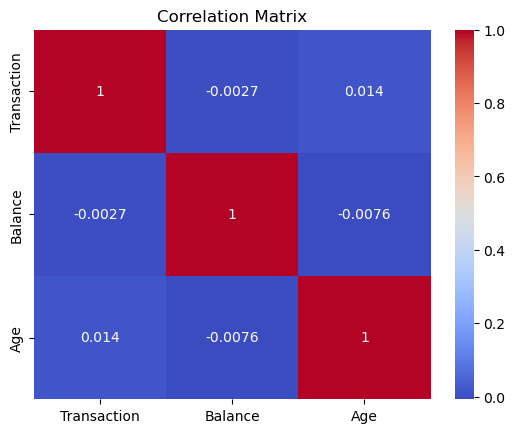

In [87]:
sns.heatmap(df[continuous].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Balance vs Age by Gender')

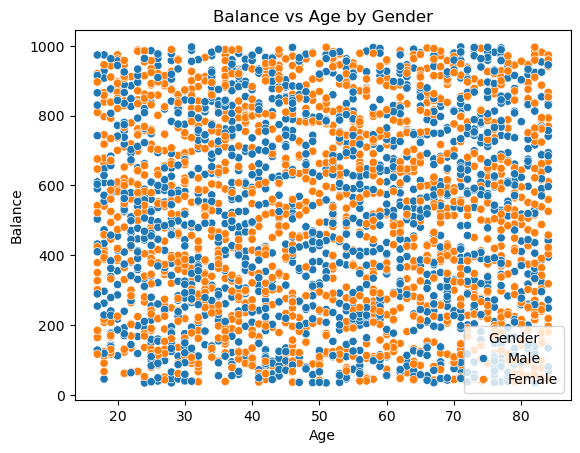

In [88]:
sns.scatterplot(x='Age', y='Balance', hue='Gender', data=df)
plt.title('Balance vs Age by Gender')